In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
alcohol_df = pd.read_csv(r"C:\\Users\\Jayprakash\\Downloads\\Cipherbyte\\Alcohol_Sales.csv")
alcohol_df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [3]:
alcohol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [4]:
alcohol_df['DATE'] = pd.to_datetime(alcohol_df['DATE'])
alcohol_df.rename(columns = {"S4248SM144NCEN":"Sales"}, inplace = True)

In [5]:
print(alcohol_df['Sales'].describe())

count      325.000000
mean      7886.400000
std       2914.269061
min       3031.000000
25%       5231.000000
50%       7481.000000
75%       9977.000000
max      15504.000000
Name: Sales, dtype: float64


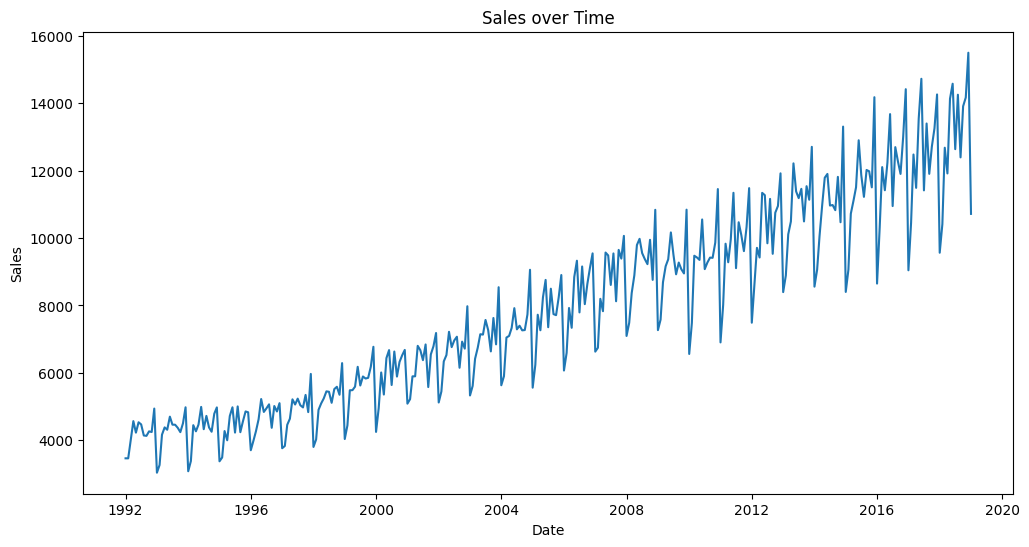

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(alcohol_df['DATE'], alcohol_df['Sales'])
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

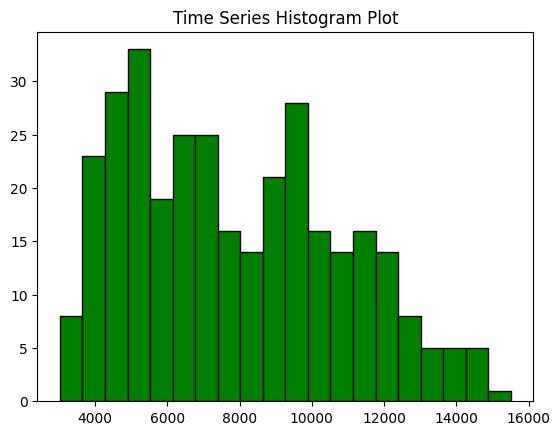

In [7]:
plt.hist(alcohol_df['Sales'], bins = 20, edgecolor = 'black', color = 'g')
plt.title("Time Series Histogram Plot")
plt.xlabel("")
plt.show()

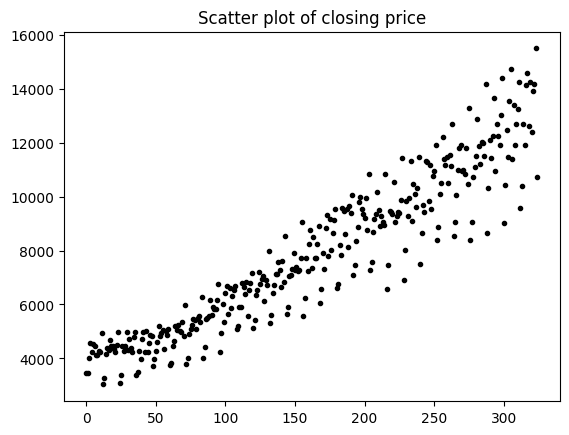

In [8]:
alcohol_df['Sales'].plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## Creating a model

In [9]:
from sklearn.model_selection import train_test_split

X = alcohol_df.index.values.reshape(-1, 1)
Y = alcohol_df['Sales'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 918096.6237587389
R-squared: 0.9009733286373165


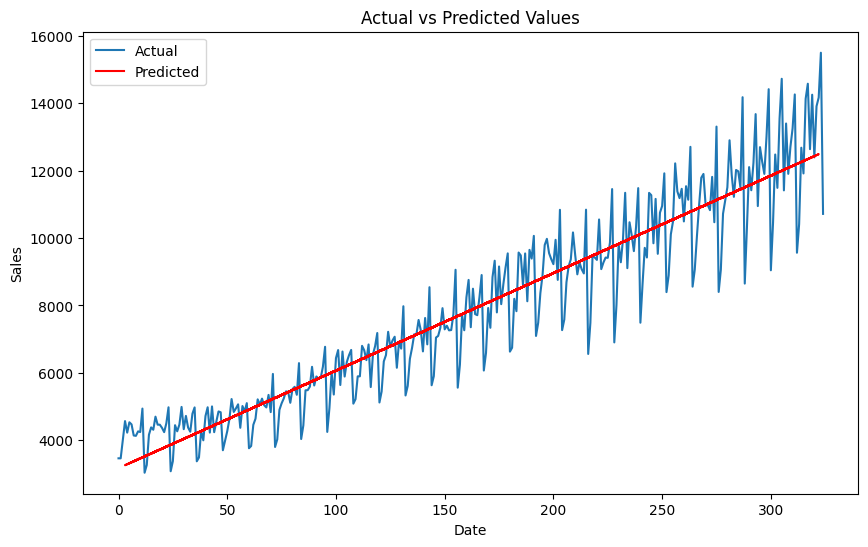

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(alcohol_df.index, alcohol_df['Sales'], label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [13]:
q1 = alcohol_df['Sales'].quantile(0.25)
q3 = alcohol_df['Sales'].quantile(0.75)

bins = [alcohol_df['Sales'].min(), q1, q3, alcohol_df['Sales'].max()]
labels = ['Low', 'Medium', 'High']

alcohol_df['Class'] = pd.cut(alcohol_df['Sales'], bins=bins, labels=labels, include_lowest=True)

print(alcohol_df.head())

        DATE  Sales Class
0 1992-01-01   3459   Low
1 1992-02-01   3458   Low
2 1992-03-01   4002   Low
3 1992-04-01   4564   Low
4 1992-05-01   4221   Low


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X = alcohol_df[['Sales']]  # Feature
y = alcohol_df['Class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        16
         Low       0.94      1.00      0.97        16
      Medium       1.00      0.97      0.98        33

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



In [15]:
miles_df = pd.read_csv(r"C:\\Users\\Jayprakash\\Downloads\\Cipherbyte\\Miles_Traveled.csv")

In [16]:
miles_df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [17]:
miles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [18]:
miles_df['DATE'] = pd.to_datetime(miles_df['DATE'])

In [19]:
miles_df.describe()

,DATE,TRFVOLUSM227NFWA
count,588,588.000000
mean,1994-06-16 13:57:33.061224448,190420.380952
min,1970-01-01 00:00:00,77442.000000
25%,1982-03-24 06:00:00,133579.000000
50%,1994-06-16 00:00:00,196797.500000
75%,2006-09-08 12:00:00,243211.500000
max,2018-12-01 00:00:00,288145.000000
std,NaN,57795.538934


In [20]:
from sklearn.model_selection import train_test_split

X = miles_df.index.values.reshape(-1, 1)
Y = miles_df['TRFVOLUSM227NFWA'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
miles_df['DATE'] = miles_df['DATE'].apply(lambda x: x.toordinal())

X = miles_df[['DATE']]
y = miles_df['TRFVOLUSM227NFWA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MSE: 265703857.89503112
Testing MSE: 306093425.90778685


As testing MSE is higher than the testing variance, the model might result into overfitting

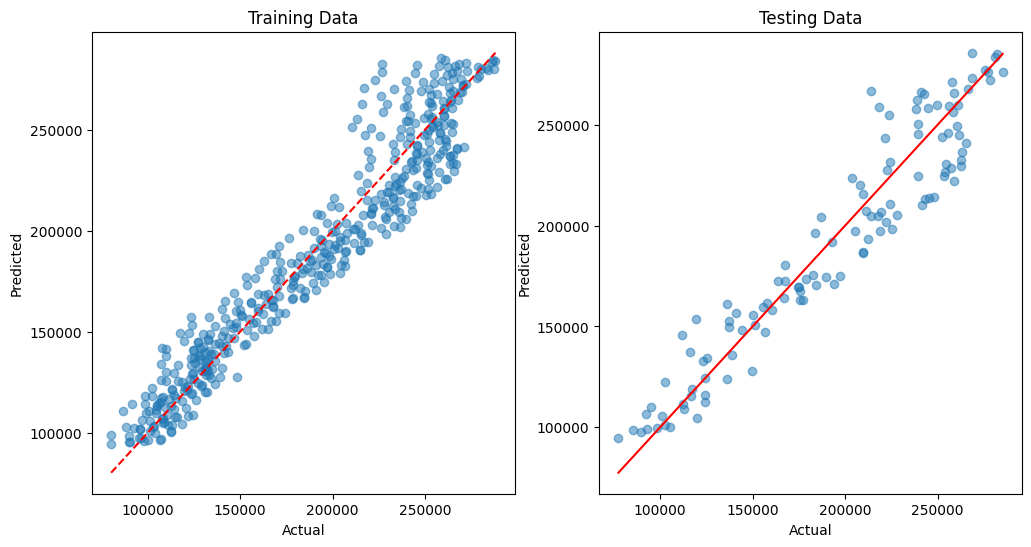

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data')

plt.show()

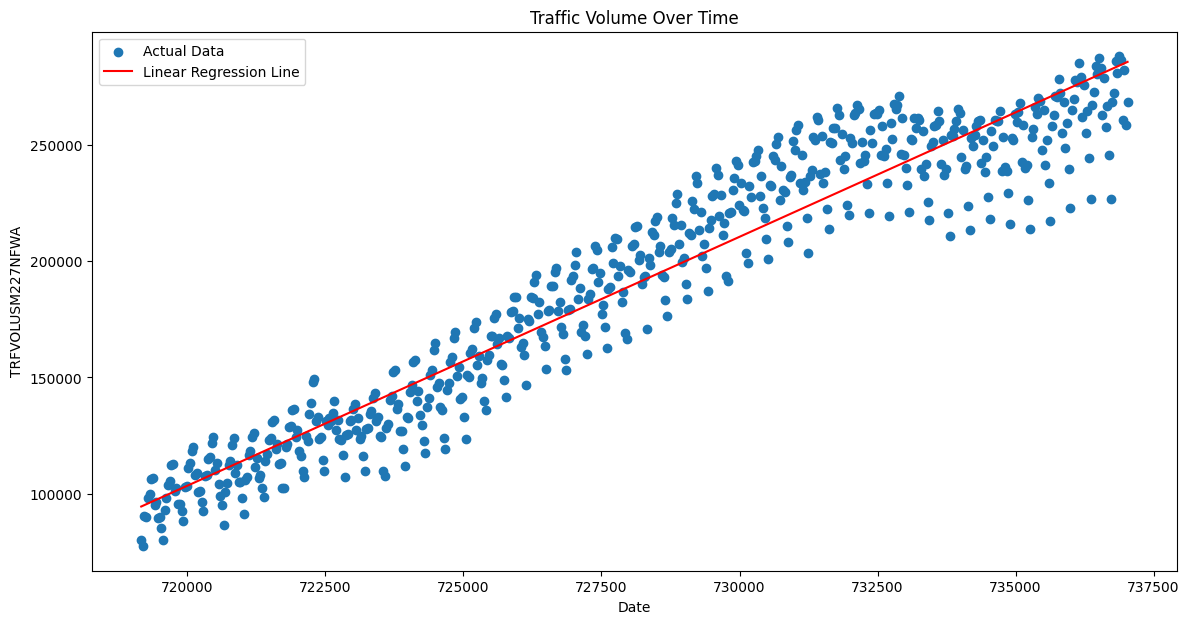

In [25]:
plt.figure(figsize=(14, 7))
plt.scatter(miles_df['DATE'], miles_df['TRFVOLUSM227NFWA'], label='Actual Data')
plt.plot(miles_df['DATE'], model.predict(miles_df[['DATE']]), color='red', label='Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('TRFVOLUSM227NFWA')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()